In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [2]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [3]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [4]:
og_df = pd.read_csv("data/novel_labelled_dataset.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,"'Me Tiger Lily,' that lovely creature would re...",joy,9
1,Me no let pirates hurt him.,sadness,14
2,It is good. Peter Pan has spoken.,thankfulness,9
3,"They said 'How-do?' to them, and things like t...",sadness,14
4,"Secretly Wendy sympathised with them a little,...",anger,12


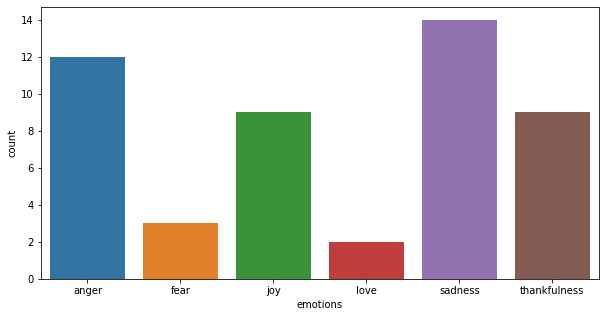

In [5]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [6]:
df = pd.read_csv("results/detected_emotions_output_031921_222035.csv")

In [7]:
pred_df = get_max_emotion_score_df(file="results/detected_emotions_output_031921_222035.csv",
                             emotion_col="emotions",
                             emotion_count_col="count")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count
0,"'Me Tiger Lily,' that lovely creature would re...",0.084,0.063,0.193,0.241,0.069,0.909,fear,4
1,Me no let pirates hurt him.,0.548,0.943,0.073,0.638,0.080,0.322,sadness,10
2,It is good. Peter Pan has spoken.,0.430,0.035,0.313,0.278,0.611,0.334,thankfulness,21
3,"They said 'How-do?' to them, and things like t...",0.271,0.081,0.965,0.068,0.981,0.056,thankfulness,21
4,"Secretly Wendy sympathised with them a little,...",0.878,0.701,0.990,0.262,0.813,0.179,anger,4


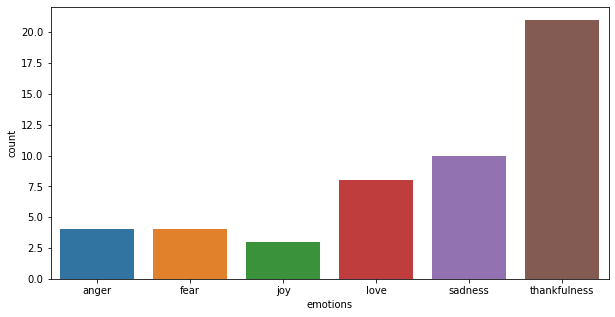

In [8]:
display_bar_chart(pred_df, emotion_col="emotions", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [9]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [10]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [11]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [12]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [13]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [14]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,"'Me Tiger Lily,' that lovely creature would re...",joy,9,2
1,Me no let pirates hurt him.,sadness,14,4
2,It is good. Peter Pan has spoken.,thankfulness,9,5
3,"They said 'How-do?' to them, and things like t...",sadness,14,4
4,"Secretly Wendy sympathised with them a little,...",anger,12,0


### Categorize Emotions column (Predicted dataset)

In [15]:
pred_df.dtypes

text             object
joy             float64
sadness         float64
anger           float64
love            float64
thankfulness    float64
fear            float64
emotions         object
count             int64
dtype: object

In [16]:
pred_df["emotions"] = pred_df["emotions"].astype('category')

In [17]:
category_dict = dict(sorted(zip(pred_df.emotions.cat.codes, pred_df.emotions)))

In [18]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [19]:
pred_df.dtypes

text              object
joy              float64
sadness          float64
anger            float64
love             float64
thankfulness     float64
fear             float64
emotions        category
count              int64
dtype: object

In [20]:
pred_df["emotions_cat"] = pred_df["emotions"].cat.codes
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,"'Me Tiger Lily,' that lovely creature would re...",0.084,0.063,0.193,0.241,0.069,0.909,fear,4,1
1,Me no let pirates hurt him.,0.548,0.943,0.073,0.638,0.080,0.322,sadness,10,4
2,It is good. Peter Pan has spoken.,0.430,0.035,0.313,0.278,0.611,0.334,thankfulness,21,5
3,"They said 'How-do?' to them, and things like t...",0.271,0.081,0.965,0.068,0.981,0.056,thankfulness,21,5
4,"Secretly Wendy sympathised with them a little,...",0.878,0.701,0.990,0.262,0.813,0.179,anger,4,0


### Creating new Dataframe with original and predicted results

In [21]:
main_df = og_df.copy(deep=True)

In [22]:
main_df["pred_emotions_cat"] = pred_df["emotions_cat"]

In [23]:
main_df.head()

,text,emotions,count,emotions_cat,pred_emotions_cat
0,"'Me Tiger Lily,' that lovely creature would re...",joy,9,2,1
1,Me no let pirates hurt him.,sadness,14,4,4
2,It is good. Peter Pan has spoken.,thankfulness,9,5,5
3,"They said 'How-do?' to them, and things like t...",sadness,14,4,5
4,"Secretly Wendy sympathised with them a little,...",anger,12,0,0


## Confusion Matrix

In [24]:
confusion = confusion_matrix(main_df["emotions_cat"], main_df["pred_emotions_cat"])

In [25]:
confusion

array([[1, 0, 1, 1, 3, 6],
       [0, 0, 0, 1, 0, 2],
       [0, 2, 1, 1, 1, 4],
       [0, 0, 0, 1, 1, 0],
       [1, 1, 0, 2, 5, 5],
       [2, 1, 1, 1, 0, 4]], dtype=int64)

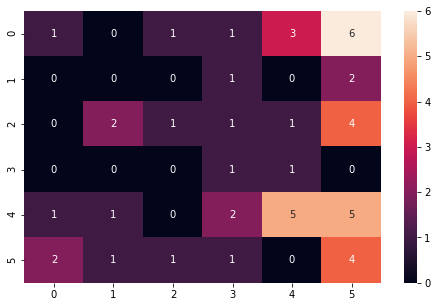

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion, annot=True)
plt.show()

### Precision-Recall Report

In [27]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [28]:
print(classification_report(main_df["emotions_cat"], main_df["pred_emotions_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.25      0.08      0.12        12
        fear       0.00      0.00      0.00         3
         joy       0.33      0.11      0.17         9
        love       0.14      0.50      0.22         2
     sadness       0.50      0.36      0.42        14
thankfulness       0.19      0.44      0.27         9

    accuracy                           0.24        49
   macro avg       0.24      0.25      0.20        49
weighted avg       0.31      0.24      0.24        49

